Two Masses
====

Coding
----

Physics
----

It is also relatively easy to model the motion of two masses on springs, depicted below:

![Two masses](img/two_masses.png)

The equations of motion describing this system are:

  $m\ddot{x}_1 = -kx_1 - k(x_1 - x_2)$

  $m\ddot{x}_2 = -kx_2 - k(x_2 - x_1)$


The symmetry of the system means that we can add these equations together to get a useful equation of "motion" for the combined co-ordinate $x_1 + x_2$:

  $m \frac{d^2}{dt^2}(x_1 + x_2) = -k(x_1 + x_2)$
  
We can also subtract them to find:

  $m \frac{d^2}{dt^2}(x_1 - x_2) = -3k(x_1 - x_2)$
  
 
This is in fact rather profound - it means that the two quantities $x_1 + x_2$ and $x_1 - x_2$ are always undergoing harmonic motion, no matter how random the overall bouncing back and forward seems to be. These are the normal modes of the system.

Let's take the case when the masses are both at rest, and $x_2(t=0) = 1$.
We can solve these equations analytically; for our case this turns out to be:

$x_1 + x_2 = 2A_+ cos(\omega_+t + \phi_+)$

$x_1 - x_2 = 2A_- cos(\omega_-t + \phi_-)$

But since we know how to solve them numerically, let's do that because its easier.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

k = 1.0
m = 1.0

omega_plus = np.sqrt(k/m)
omega_minus = np.sqrt(3*k/m)

min_time, max_time, n_timesteps = 0.0, 10.0, 100
times = np.linspace(min_time, max_time, n_timesteps)

# TODO mageic
plus_coord = 0.5 * np.cos(omega_plus * times)
minus_coord = 0.5 * np.cos(omega_minus * times)


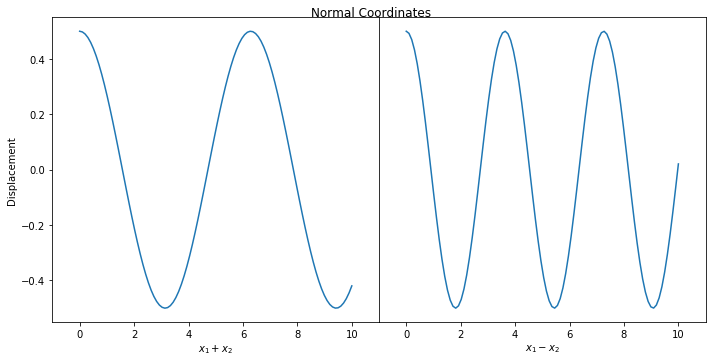

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# TODO note about magic numbers
labels = r"$x_1 + x_2$", r"$x_1 - x_2$"
for a, label in zip(ax, labels):
    a.set_xlabel(label)
    a.set_xlim(min_time-1, max_time+1)
ax[0].set_ylabel("Displacement")
ax[1].set_yticks([])
fig.suptitle("Normal Coordinates", position=(0.52, 1.0))

ax[0].plot(times, plus_coord)
ax[1].plot(times, minus_coord)


fig.tight_layout()
fig.subplots_adjust(wspace=0)
plt.show()